<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Clustering_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Based on: https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/



from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# load dataset
url = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/master_horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
data.shape

(300, 28)


**Sobre el dataset**

El dataset sobre cólicos de caballos describe las características médicas de los caballos con cólicos y si vivieron o murieron.

Hay 300 filas y 26 variables de entrada con una variable de salida. Es una tarea de predicción de clasificación binaria que implica predecir 1 si el caballo vivió y 2 si el caballo murió.

Hay muchos campos que podríamos seleccionar para predecir en este conjunto de datos. En este caso predeciremos si el problema fue quirúrgico o no (índice de columna 23), convirtiéndolo en un problema de clasificación binaria.

El conjunto de datos tiene muchos valores faltantes para muchas de las columnas donde cada valor faltante está marcado con un signo de interrogación (“?”)

In [2]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [3]:
# La fila 23 es el target
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
X.shape

(300, 27)

In [4]:
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [5]:
# evaluate knn imputation and random forest for the horse colic dataset

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.860 (0.059)


>1 0.859 (0.058)
>3 0.862 (0.052)
>5 0.868 (0.060)
>7 0.861 (0.054)
>9 0.863 (0.055)
>15 0.864 (0.047)
>18 0.864 (0.045)
>21 0.869 (0.053)


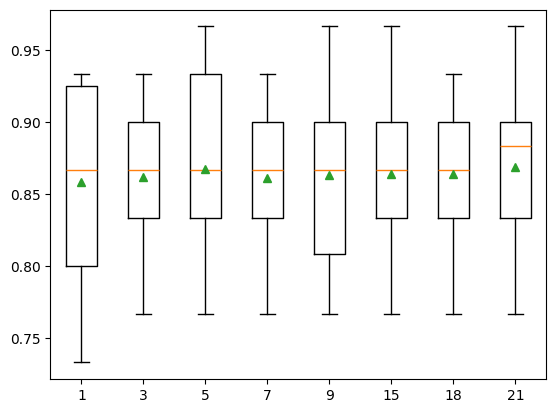

In [6]:

# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:

# create the modeling pipeline
 pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])

# evaluate the model
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# store results
 results.append(scores)
 print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()